# Hierachical clustering

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the data
df = pd.read_csv("Universities.csv")

In [3]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
#drop the column its not in use
x = df.drop(columns=['Univ'])
x

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [5]:
#Feature scaling (it is use when we calculate distance )
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [6]:
x = sc.fit_transform(x)
x

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [7]:
#clustering
from scipy.cluster import hierarchy

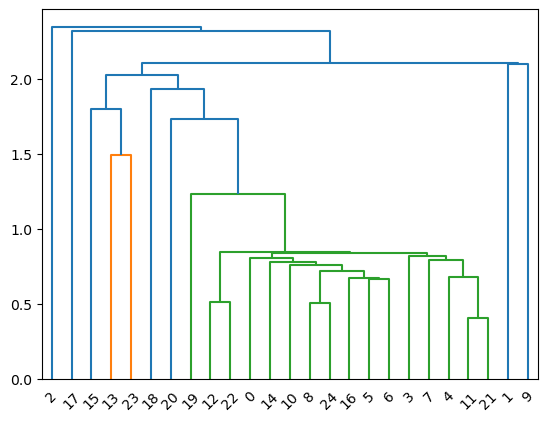

In [8]:
#dendrogram
lk = hierarchy.linkage(x)  #use linkage function to calculate distance between clusters before draw dendrogram
dendrogram = hierarchy.dendrogram(lk)
# this is single linkage method

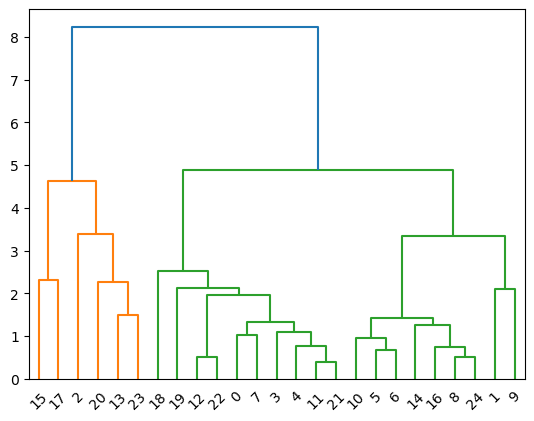

In [9]:
# this is complete linkage method
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)


In [10]:
# 2nd Method
from sklearn.cluster import AgglomerativeClustering

In [11]:
#Restore in variable
hc = AgglomerativeClustering(n_clusters=4)
y = hc.fit_predict(x)

In [12]:
#clusters
y

array([0, 2, 0, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 1, 3, 1, 3, 1, 0, 0, 0, 0,
       0, 1, 3], dtype=int64)

In [13]:
# add cluster column in data
df['Cluster'] = y

In [14]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [15]:
# use groupby function to calculate average according to clusters
df.groupby('Cluster').agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Cluster,,,,,,
0,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
3,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429


In [16]:
# data under 2nd cluster
df[df['Cluster']==2]


,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
1,CalTech,1415,100,25,6,63575,81,2
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [17]:
# data under 1st cluster
df[df['Cluster']==1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
23,UWisconsin,1085,40,69,15,11857,71,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


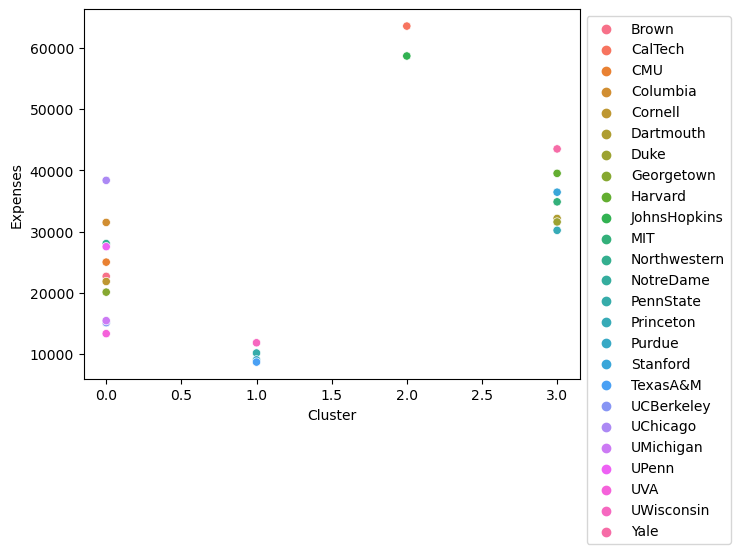

In [18]:
#scatterplot for universities
import seaborn as sns

sns.scatterplot(df['Cluster'],df['Expenses'],hue=df['Univ'])
plt.legend(bbox_to_anchor = (1,1))

# K-means

In [19]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [20]:
#Read Data
df = pd.read_csv(r"C:\Users\Arati\Downloads\Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
# recall only useful columns
df = df[['Annual Income (k$)','Spending Score (1-100)']]

In [22]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [23]:
# data description
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

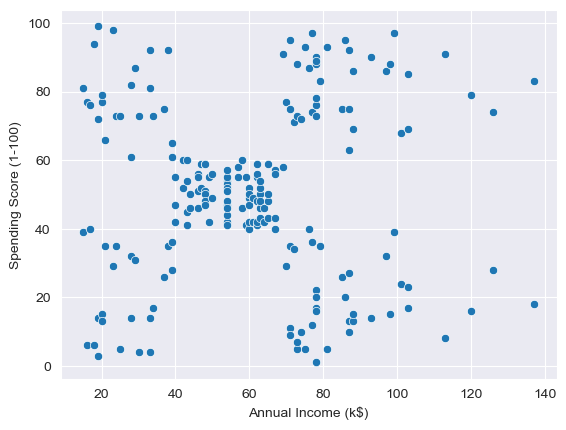

In [24]:
# Scatterplot
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'])

In [25]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [26]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [27]:
#Clustering
from sklearn.cluster import KMeans

In [28]:
#stored in any variable
km = KMeans()
y = km.fit_predict(x)

In [29]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 7, 6, 7, 5, 7, 5, 7,
       6, 7, 5, 7, 5, 7, 5, 7, 5, 7, 6, 7, 5, 7, 6, 7, 5, 7, 5, 7, 5, 7,
       5, 7, 5, 7, 5, 7, 6, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7, 5, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [30]:
# calculate centers for clusters (y)
km.cluster_centers_

array([[-0.514975  ,  0.00635262],
       [ 1.87564575, -1.09476801],
       [ 1.81769762,  1.26275949],
       [-1.35366972,  1.15873115],
       [-1.35185213, -1.19089759],
       [ 0.73205646, -1.42897101],
       [ 0.12403247, -0.09834795],
       [ 0.66703804,  1.23036618]])

In [31]:
# Generate clusters
x = pd.DataFrame(x)
x['Cluster'] = y
x

,0,1,Cluster
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,2
196,2.497807,-0.861839,1
197,2.497807,0.923953,2
198,2.917671,-1.250054,1


In [32]:
km.cluster_centers_

array([[-0.514975  ,  0.00635262],
       [ 1.87564575, -1.09476801],
       [ 1.81769762,  1.26275949],
       [-1.35366972,  1.15873115],
       [-1.35185213, -1.19089759],
       [ 0.73205646, -1.42897101],
       [ 0.12403247, -0.09834795],
       [ 0.66703804,  1.23036618]])

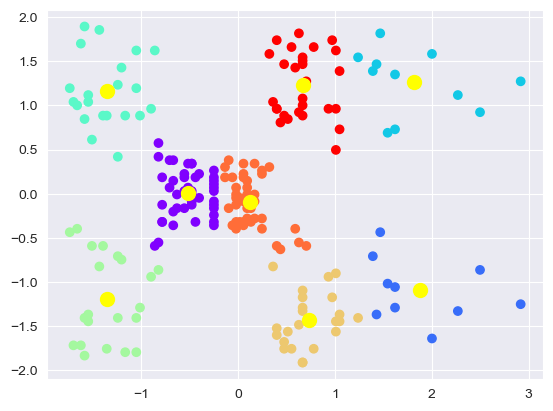

In [33]:
#Draw scatterplot to get Centroid
plt.scatter(x.iloc[:,0],x.iloc[:,1], c = x['Cluster'], cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 100)


In [34]:
#include clusters column in data
x

,0,1,Cluster
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,2
196,2.497807,-0.861839,1
197,2.497807,0.923953,2
198,2.917671,-1.250054,1


In [35]:
# stored data any new variable
x1 = x.iloc[:,:-1]
x1

,0,1
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


# Elbow Graph

In [36]:
wcss = []

for i in range(1,25):
    km = KMeans(n_clusters=i)
    km.fit_predict(x1)
    wcss.append(km.inertia_)

In [37]:
# construct within cluster sum of square
wcss

[400.0,
 270.66820496844673,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.37581558455638,
 44.86475569922557,
 37.19952387597709,
 32.40665967645661,
 29.061152995353442,
 26.71356214524141,
 23.61950849561388,
 21.3961809503069,
 19.742746998306572,
 17.244247021483513,
 16.347033048474987,
 14.864210456123207,
 14.091545461281335,
 13.130848614936804,
 12.141343646757488,
 11.281236129585068,
 10.820606816268393,
 9.889733550638741,
 9.519913967702415]

Text(0, 0.5, 'WCSS')

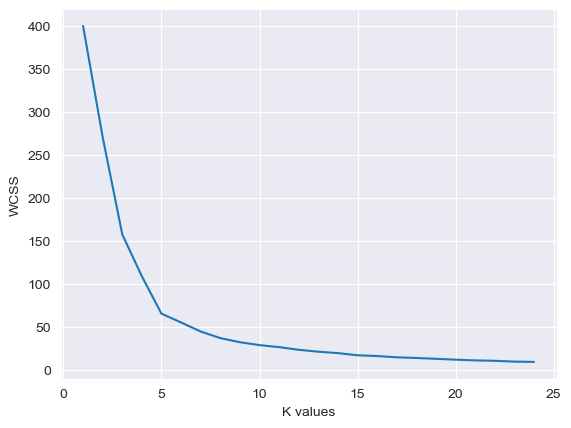

In [38]:
plt.plot(range(1,25), wcss)  # Range is not fixed
plt.xlabel('K values')
plt.ylabel('WCSS')

In [39]:
# Clusters
km = KMeans(n_clusters=5)
y = km.fit_predict(x1)
y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [40]:
# include clusters column in dataset
x1['Cluster'] = y

x1

,0,1,Cluster
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,2
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,2
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,3
196,2.497807,-0.861839,1
197,2.497807,0.923953,3
198,2.917671,-1.250054,1


In [41]:
km.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275],
       [-1.30751869, -1.13696536]])

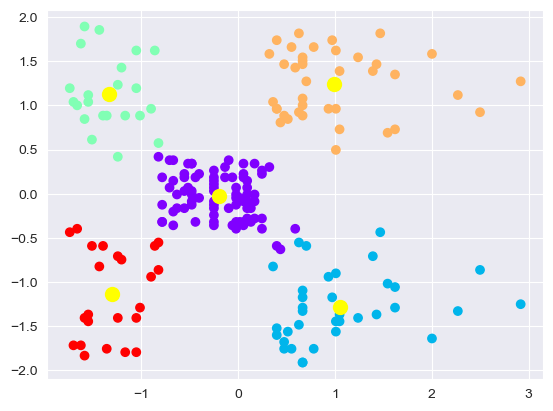

In [42]:
plt.scatter(x1.iloc[:,0], x.iloc[:,1], c = x1['Cluster'], cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 100)


In [43]:
df['Y'] = y
df

,Annual Income (k$),Spending Score (1-100),Y
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,1
197,126,74,3
198,137,18,1


In [44]:
#Analyze the data
df.groupby('Y').agg('mean')

,Annual Income (k$),Spending Score (1-100)
Y,,
0,55.296296,49.518519
1,88.200000,17.114286
2,25.727273,79.363636
3,86.538462,82.128205
4,26.304348,20.913043


In [45]:
# Pandas filtering
df[df['Y'] == 1]

,Annual Income (k$),Spending Score (1-100),Y
124,70,29,1
128,71,11,1
130,71,9,1
134,73,5,1
136,73,7,1
138,74,10,1
140,75,5,1
144,77,12,1
146,77,36,1
148,78,22,1


In [46]:
# perform supervised ML after getting labelled data(y)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [47]:
df

,Annual Income (k$),Spending Score (1-100),Y
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,1
197,126,74,3
198,137,18,1


In [48]:
# spilliting 
x = df.iloc[:,:-1]
y = df['Y']

In [49]:
#train test
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [50]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [51]:
# to find accuracy
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      1.00      1.00         9
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         5
           4       1.00      0.75      0.86         8

    accuracy                           0.93        40
   macro avg       0.96      0.91      0.93        40
weighted avg       0.94      0.93      0.92        40



# DBSCAN

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
#Read data
df = pd.read_csv("Wholesale.csv",index_col=0)

In [54]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [55]:
#perform EDA
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [56]:
plt.rcParams['figure.figsize'] = (10,5)  #boxplot size
plt.rcParams['figure.dpi'] = 250             # background

<AxesSubplot:>

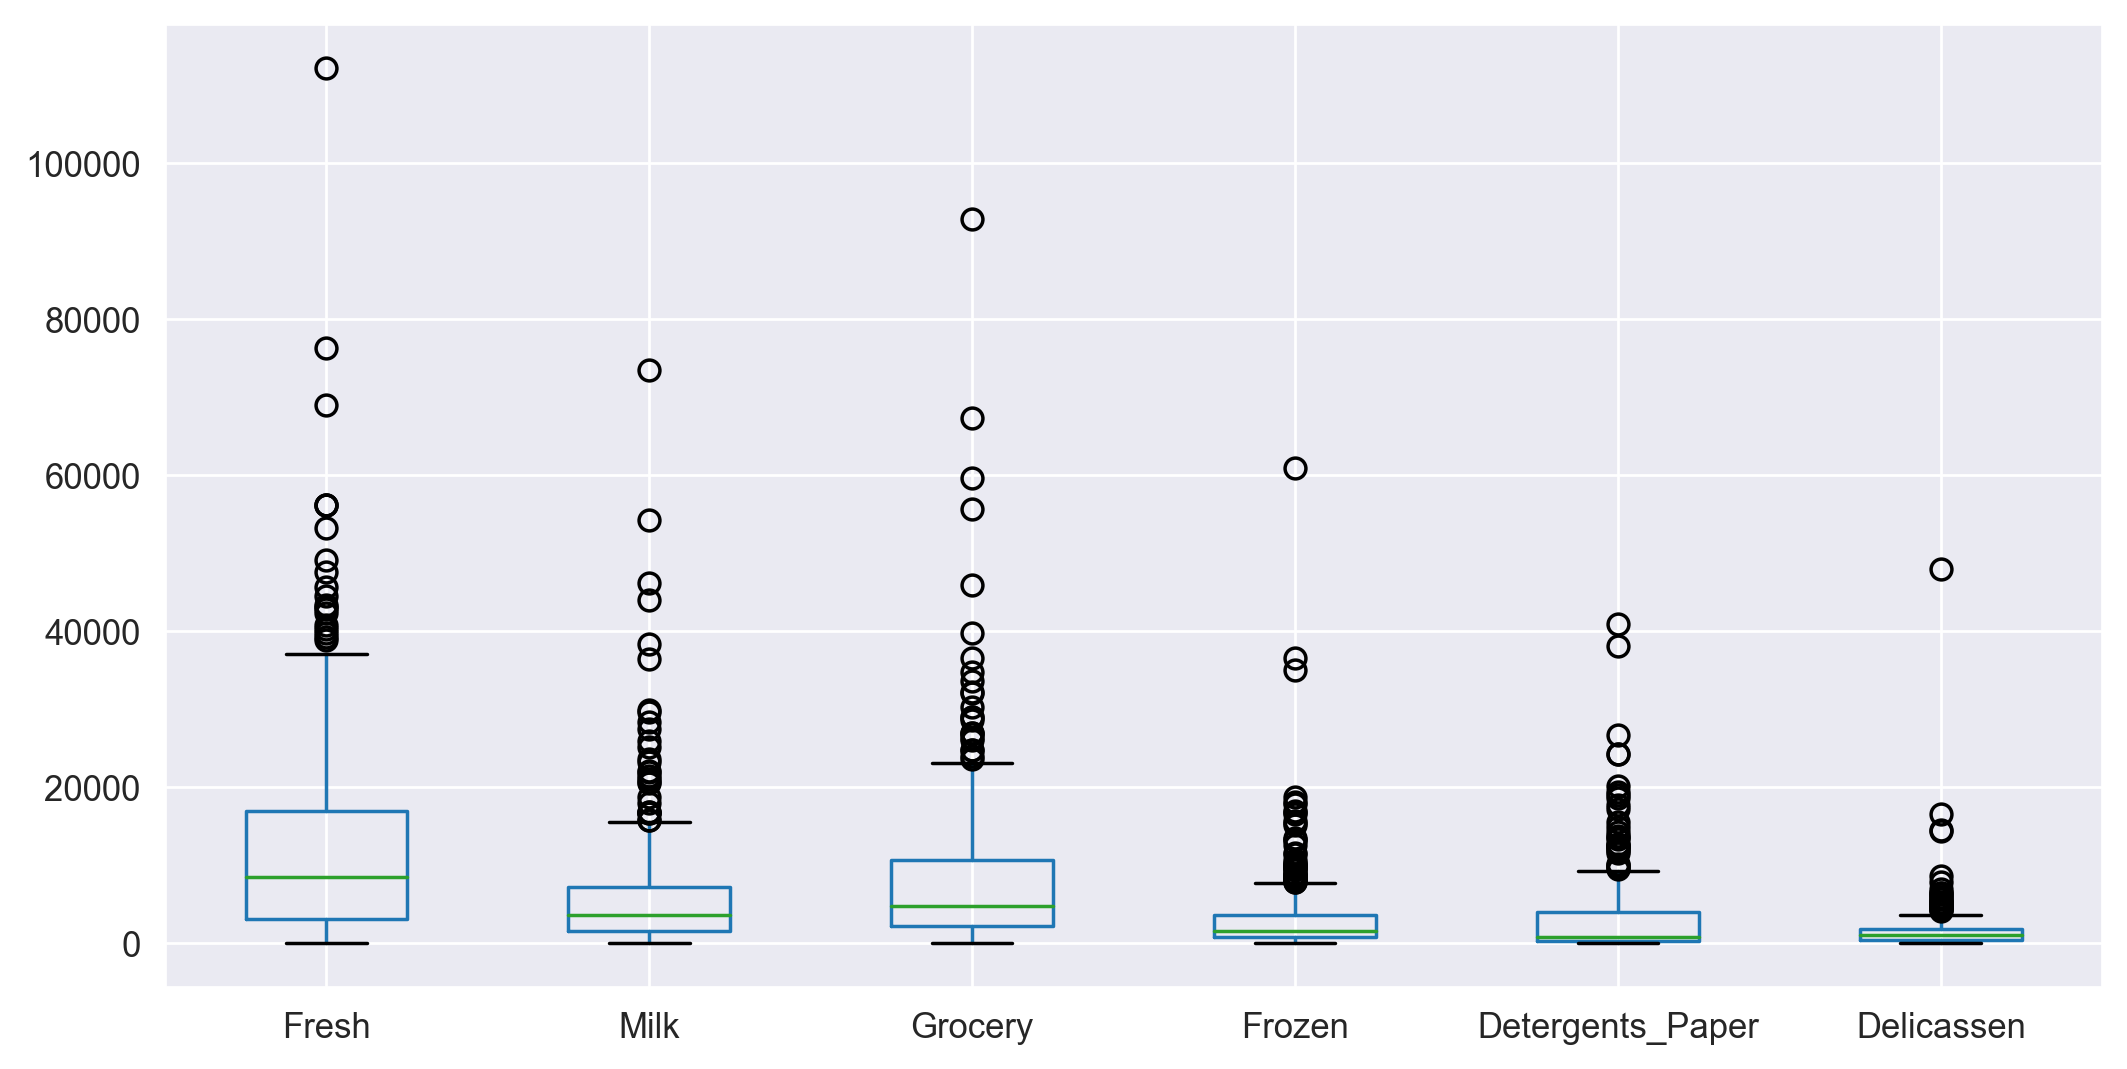

In [57]:
#Draw Boxplot for outlier detection
df.boxplot()
# size of outlier is depend on the range/count of the column

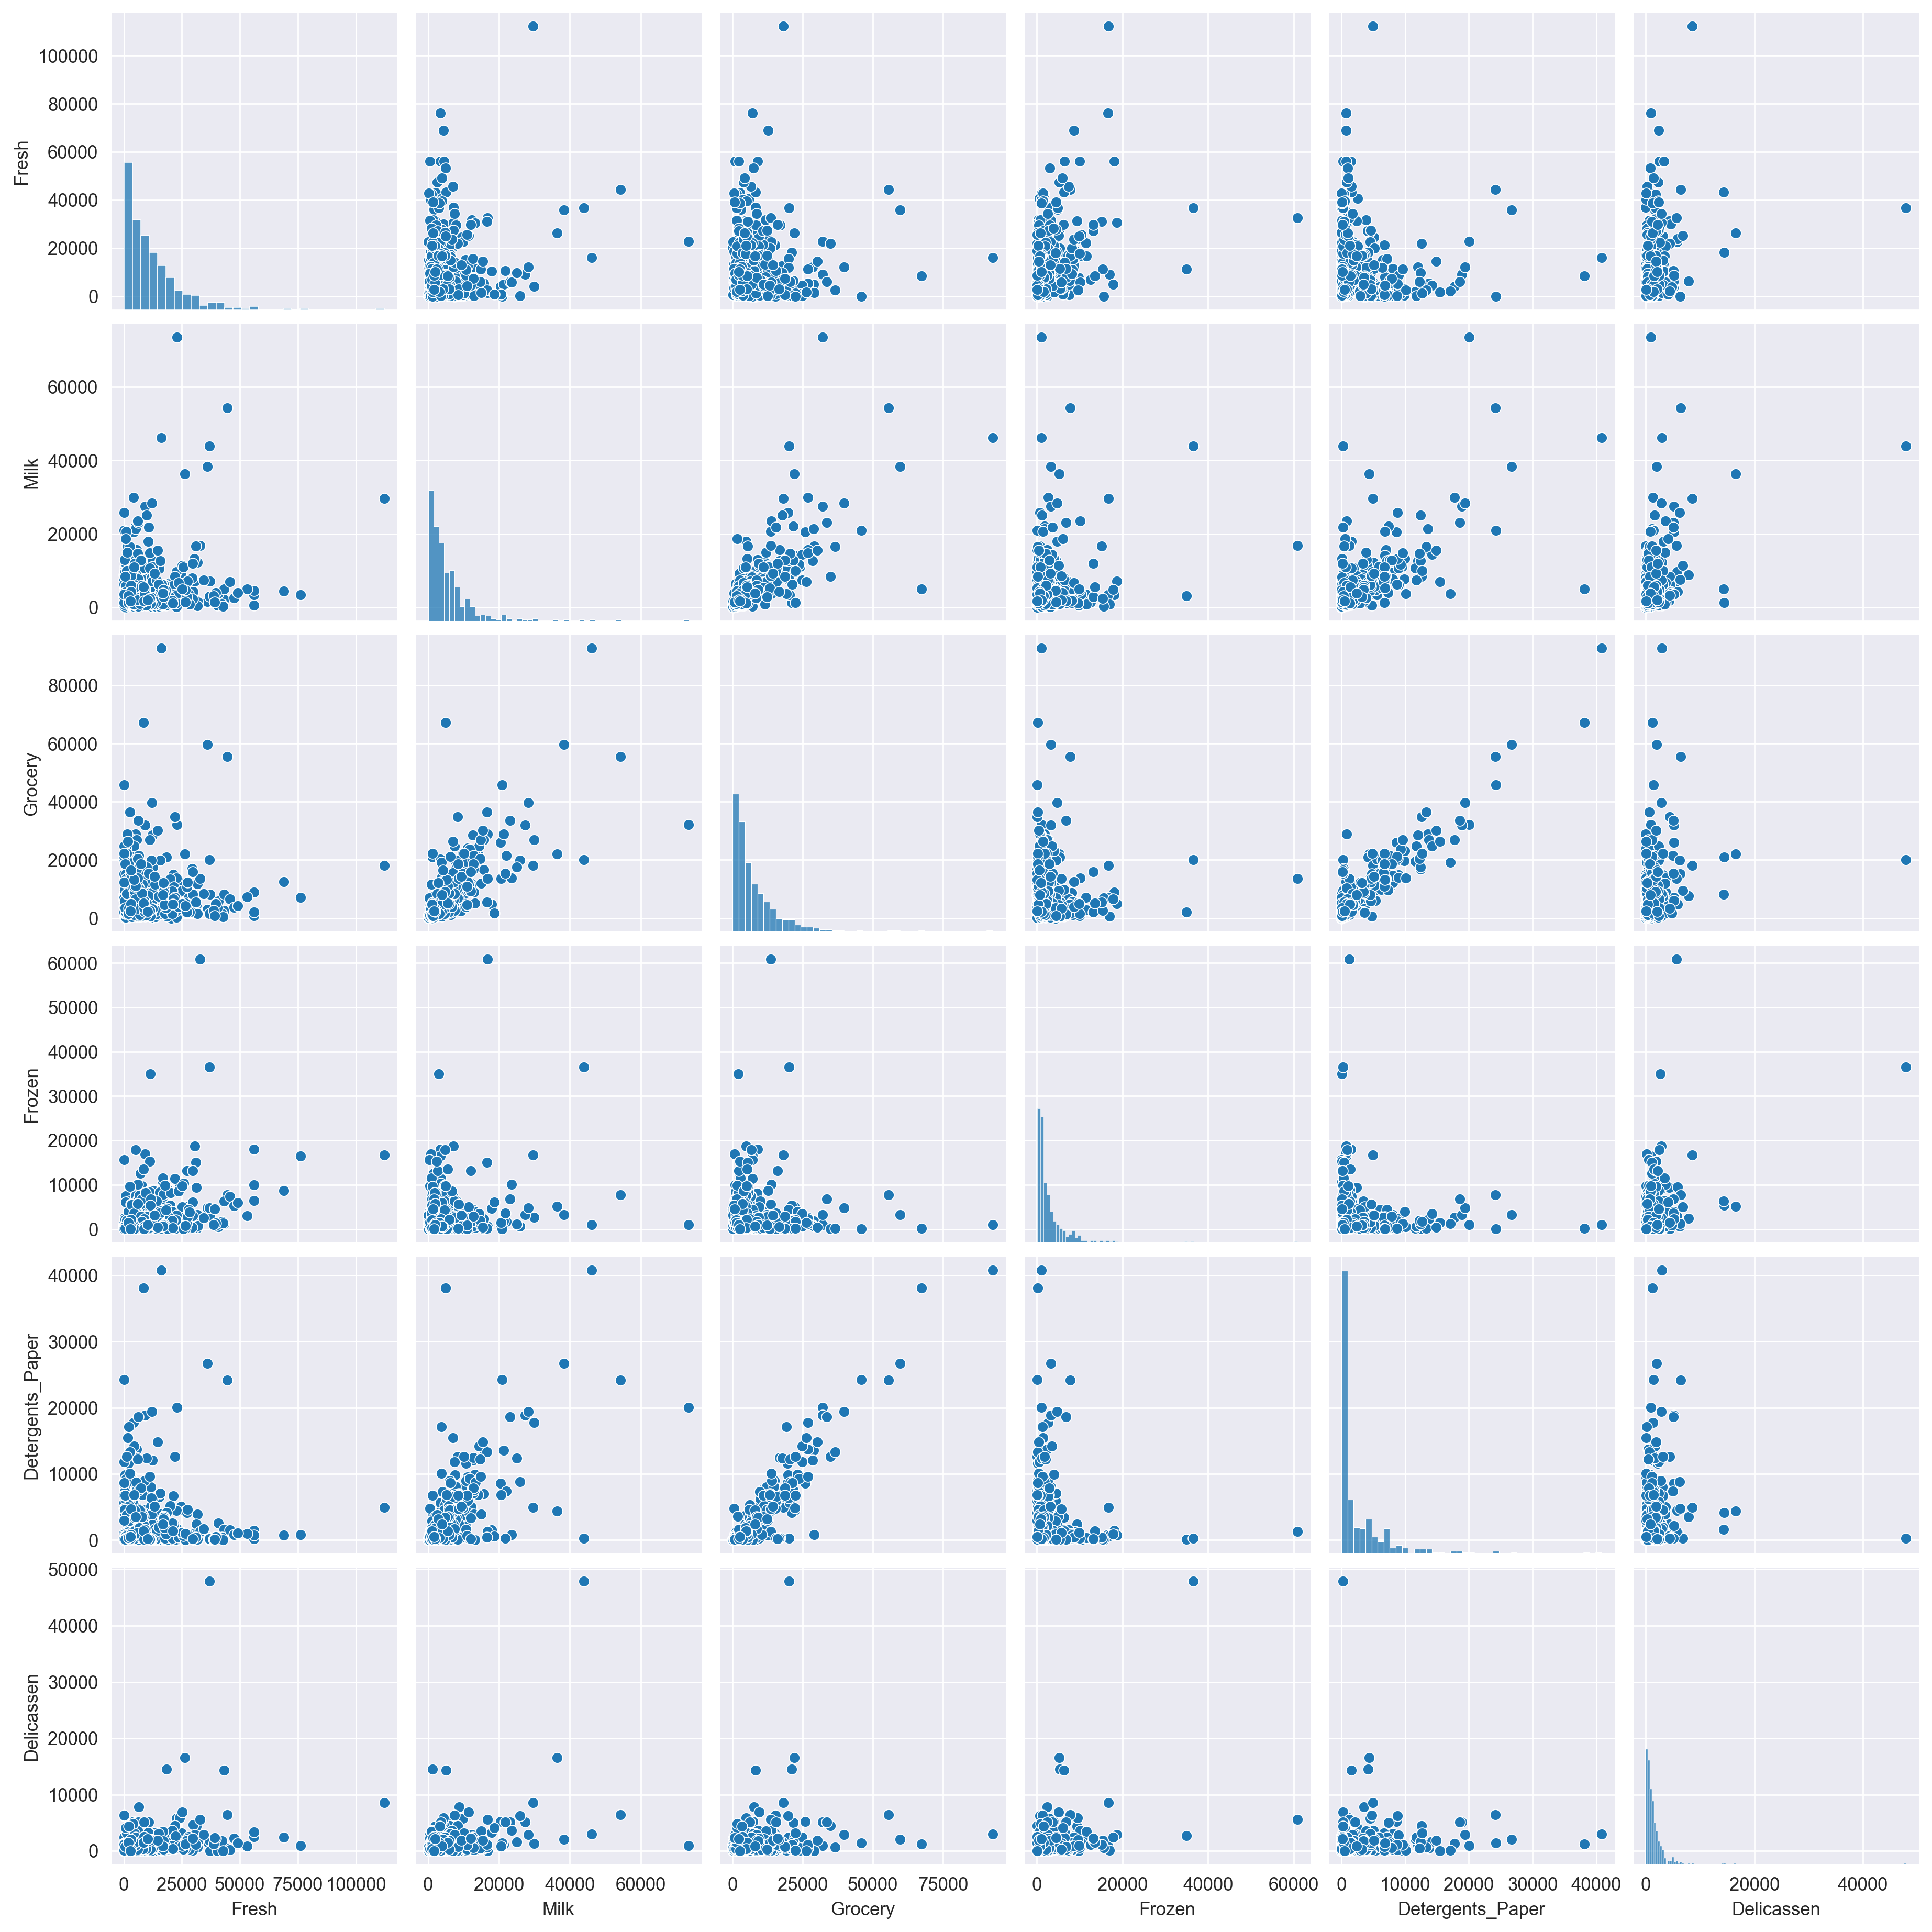

In [58]:
import seaborn as sns

sns.pairplot(df)

In [59]:
#Feature Scaling
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [60]:
#for clustering
from sklearn.cluster import DBSCAN

In [61]:
#stored in new variable
db = DBSCAN()
db.fit(x)

DBSCAN()

In [62]:
#convert it in cluster
db.labels_

array([ 0,  0, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1, -1, -1,  0,  0,
       -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  1, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,
        0, -1,  0,  0,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0, -1, -1, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1, -1,
        0, -1,  0,  0,  0, -1,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1, -1,  0, -1,  0,  1,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,
        0, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,
       -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0,
        0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0

In [63]:
# Evaluation matrics for clustering
from sklearn.metrics import silhouette_score

In [64]:
silhouette_score(x,db.labels_)

0.1958113956262888

In [65]:
# increase accuracy by changing value of eps and min_samples
db  =DBSCAN(eps=2, min_samples=3)

db.fit_predict(x)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [66]:
silhouette_score(x,db.labels_)

0.7486988127438182

In [67]:
df['Y'] = db.labels_
#df

In [68]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Y
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


In [69]:
df[df['Y']==-1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Y
23,26373,36423,22019,5154,4337,16523,-1
47,44466,54259,55571,7782,24171,6465,-1
61,35942,38369,59598,3254,26701,2017,-1
65,85,20959,45828,36,24231,1423,-1
71,18291,1266,21042,5373,4173,14472,-1
85,16117,46197,92780,1026,40827,2944,-1
86,22925,73498,32114,987,20070,903,-1
87,43265,5025,8117,6312,1579,14351,-1
93,11314,3090,2062,35009,71,2698,-1
181,112151,29627,18148,16745,4948,8550,-1


In [70]:
df.groupby('Y').agg('mean')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Y,,,,,,
-1,31466.000000,28802.076923,35259.461538,13785.538462,14670.846154,9624.076923
0,11407.665105,5095.854801,7119.880562,2745.756440,2522.566745,1278.290398


# Practice

In [71]:
df1 = pd.read_csv("Mall_Customers.csv")

In [72]:
df1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [73]:
# recall only useful columns
df1 = df1[['Annual Income (k$)','Spending Score (1-100)']]

In [74]:
df1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [75]:
plt.rcParams['figure.figsize'] = (10,5)  #boxplot size
plt.rcParams['figure.dpi'] = 250             # background

<AxesSubplot:>

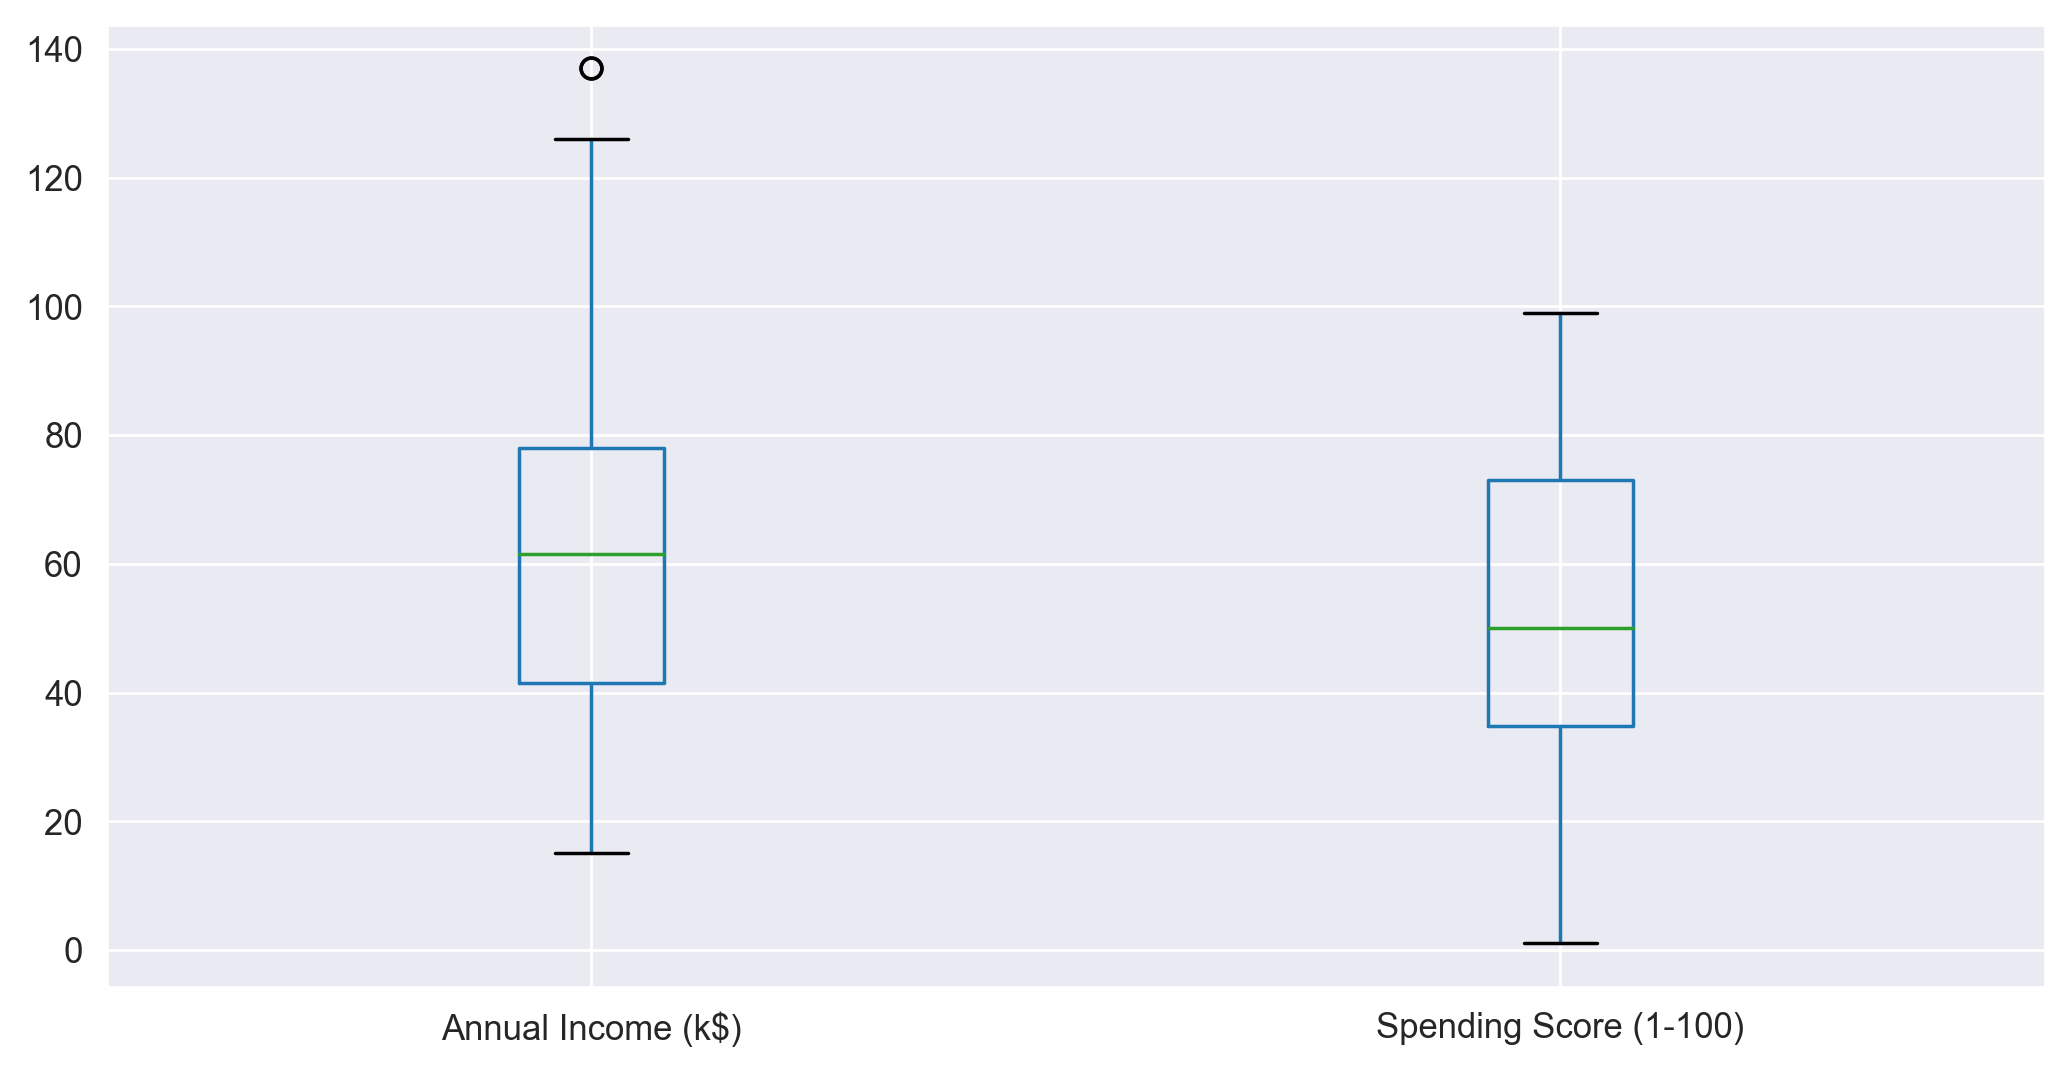

In [76]:
df1.boxplot()

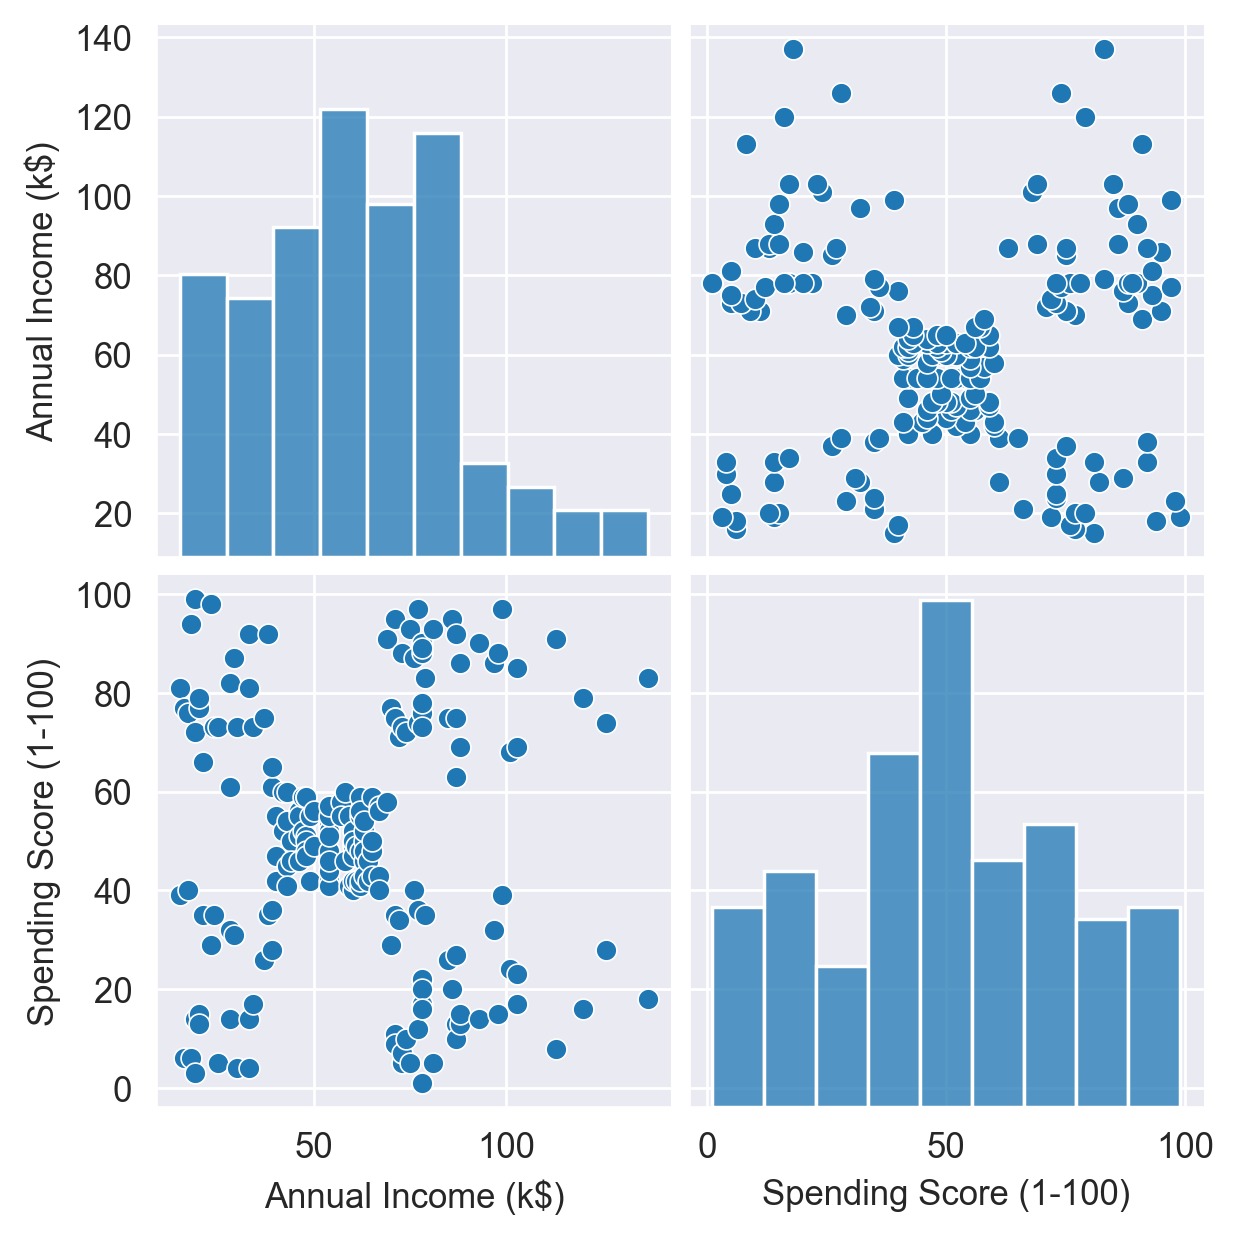

In [77]:
import seaborn as sns

sns.pairplot(df1)

In [78]:
#Feature Scaling
sc = StandardScaler()

x = sc.fit_transform(df1)
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [79]:
#for clustering
from sklearn.cluster import DBSCAN

In [80]:
#stored in new variable
db = DBSCAN()
db.fit(x)

DBSCAN()

In [81]:
#convert it in cluster
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0, -1, -1,  1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [82]:
from sklearn.metrics import silhouette_score

In [83]:
silhouette_score(x,db.labels_)

0.35044619989666004

In [84]:
db  =DBSCAN(eps=0.5, min_samples=3)

db.fit_predict(x)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1, -1,  1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [85]:
silhouette_score(x,db.labels_)

0.3566017629129311

In [86]:
df1['Y'] = db.labels_

In [87]:
# Pandas Filtering
df1[df1['Y']==-1]

,Annual Income (k$),Spending Score (1-100),Y
192,113,8,-1
194,120,16,-1
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1
199,137,83,-1


In [88]:
#Analyse the data
df1.groupby('Y').agg('mean') 

,Annual Income (k$),Spending Score (1-100)
Y,,
-1,125.571429,43.714286
0,52.490446,43.101911
1,83.111111,82.416667
